In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pd
import xlsxwriter 
import os

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


Ref=pd.read_excel(r'E:\PWT\numpyref.xlsx')
source = "G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Resampled"
dir_list = os.listdir(source)
os.chdir(source)
dir_list.sort()
workbook = xlsxwriter.Workbook('Test_data.xlsx') 
row=0
bold = workbook.add_format({'bold': True})
for j in range(len(dir_list)):
    #worksheet = workbook.add_worksheet(Ref.OUTPUT[j]) 
    filename = dir_list[j]
    Metal=pd.read_excel(filename,'Head_Metal',header=0,names=None,index_col=0)
    Favourite=pd.read_excel(filename,'Head_Favourite',header=0,names=None,index_col=0)
    os.chdir('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots')
    Dir=Ref.TITLE_SHEET[j]
    os.mkdir(Dir)
    os.chdir(Dir)
    param_full=Metal.columns.values
    for i in range(1,16):
        if workbook.get_worksheet_by_name(param_full[i]):
            worksheet=workbook.get_worksheet_by_name(param_full[i])
        else:
            worksheet = workbook.add_worksheet(param_full[i])
            row=0
            worksheet.write(row,0,'Participant',bold)
            worksheet.write(row,1,'MPF_Metal',bold)
            worksheet.write(row,2,'MPF_Favourite',bold)
            worksheet.write(row,3,'(MPF_Favourite-MPF_Metal)',bold)
            worksheet.write(row,4,'Area_Metal',bold)
            worksheet.write(row,5,'Area_Favourite',bold)
            worksheet.write(row,6,'Max_Power_Metal',bold)
            worksheet.write(row,7,'Dom_Freq_Metal',bold)
            worksheet.write(row,8,'Max_Power_Favourite',bold)
            worksheet.write(row,9,'Dom_Freq_Favourite',bold)
            row+=1
        param=param_full[i]
        low_cutoff=1
        high_cutoff=20
        freq=100
        order=4
        PSD=plt.figure()
        Metal_PSD=plt.psd(butter_bandpass_filter(Metal[param], low_cutoff,high_cutoff, freq, order), Fs=100)
        Favourite_PSD=plt.psd(butter_bandpass_filter(Favourite[param],low_cutoff,high_cutoff, freq, order), Fs=100)
        PSD.legend(['Metal','Favourite'])
        PSD.suptitle(param)
        PSD.savefig(Ref.TITLE_SHEET[j]+'_'+param+'.png')
        MPF_Metal=np.linalg.norm(np.multiply(Metal_PSD[0],Metal_PSD[1]),1)/np.linalg.norm(Metal_PSD[0],1)
        MPF_Favourite=np.linalg.norm(np.multiply(Favourite_PSD[0],Favourite_PSD[1]),1)/np.linalg.norm(Favourite_PSD[0],1)
        worksheet.write(row,0,Ref.OUTPUT[j])
        worksheet.write(row,1,MPF_Metal)
        worksheet.write(row,2,MPF_Favourite)
        worksheet.write(row,3,(MPF_Favourite-MPF_Metal))
        worksheet.write(row,4,np.linalg.norm(np.multiply(Metal_PSD[0],Metal_PSD[1]),1))
        worksheet.write(row,5,np.linalg.norm(np.multiply(Favourite_PSD[0],Favourite_PSD[1]),1))
        worksheet.write(row,6,Metal_PSD[0][np.argmax(Metal_PSD[0])])
        worksheet.write(row,7,Metal_PSD[1][np.argmax(Metal_PSD[0])])
        worksheet.write(row,8,Favourite_PSD[0][np.argmax(Favourite_PSD[0])])
        worksheet.write(row,9,Favourite_PSD[1][np.argmax(Favourite_PSD[0])])
        plt.clf()
    row=row+1
    plt.clf()
    os.chdir(source)
workbook.close() 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
parama='Dom_Freq_Metal'
paramb='Dom_Freq_Favourite'
Data_Accx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accx',header=0,names=None)
Data_Accy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accy',header=0,names=None)
Data_Accz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accz',header=0,names=None)
Data_gyrox=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gyrox',header=0,names=None)
Data_gryoy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoy',header=0,names=None)
Data_gryoz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoz',header=0,names=None)
Data_eulerx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerx',header=0,names=None)
Data_eulery=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulery',header=0,names=None)
Data_eulerz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerz',header=0,names=None)
Data_linaccx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccx',header=0,names=None)
Data_linaccy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccy',header=0,names=None)
Data_linaccz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccz',header=0,names=None)
print("Ttest mean of accx ",parama,"-",paramb,stats.ttest_1samp((Data_Accx[parama]-Data_Accx[paramb]),0.0))
print("Ttest mean of accy ",parama,"-",paramb,stats.ttest_1samp((Data_Accy[parama]-Data_Accy[paramb]),0.0))
print("Ttest mean of accz ",parama,"-",paramb,stats.ttest_1samp((Data_Accz[parama]-Data_Accz[paramb]),0.0))
print("Ttest mean of gyrox ",parama,"-",paramb,stats.ttest_1samp((Data_gyrox[parama]-Data_gyrox[paramb]),0.0))
print("Ttest mean of gyroy ",parama,"-",paramb,stats.ttest_1samp((Data_gryoy[parama]-Data_gryoy[paramb]),0.0))
print("Ttest mean of gyroz ",parama,"-",paramb,stats.ttest_1samp((Data_gryoz[parama]-Data_gryoz[paramb]),0.0))
print("Ttest mean of eulerx ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerz[parama]-Data_eulerz[paramb]),0.0))
print("Ttest mean of eulery ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulery[parama]-Data_eulery[paramb]),0.0))
print("Ttest mean of eulerz ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerx[parama]-Data_eulerx[paramb]),0.0))
print("Ttest mean of linaccx ",parama,"-",paramb,stats.ttest_1samp((Data_linaccx[parama]-Data_linaccx[paramb]),0.0))
print("Ttest mean of linaccy ",parama,"-",paramb,stats.ttest_1samp((Data_linaccy[parama]-Data_linaccy[paramb]),0.0))
print("Ttest mean of linaccz ",parama,"-",paramb,stats.ttest_1samp((Data_linaccz[parama]-Data_linaccz[paramb]),0.0))

Ttest mean of accx  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Ttest mean of accy  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=1.3656005509902465, pvalue=0.18527190025184792)
Ttest mean of accz  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=0.3470141901529955, pvalue=0.731735743135865)
Ttest mean of gyrox  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Ttest mean of gyroy  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=-0.4396331549421287, pvalue=0.6643060340022995)
Ttest mean of gyroz  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=0.6243640832675886, pvalue=0.538533142125714)
Ttest mean of eulerx  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=-0.5691604887655423, pvalue=0.5747639985876496)
Ttest mean of eulery  Dom_Freq_Metal - Dom_Freq_Favourite Ttest_1sampResult(statistic=nan, pvalue=nan)
Ttest mean of eulerz  Dom_Freq_Met

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
parama='MPF_Metal'
paramb='MPF_Favourite'
Data_Accx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accx',header=0,names=None)
Data_Accy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accy',header=0,names=None)
Data_Accz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accz',header=0,names=None)
Data_gyrox=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gyrox',header=0,names=None)
Data_gryoy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoy',header=0,names=None)
Data_gryoz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoz',header=0,names=None)
Data_eulerx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerx',header=0,names=None)
Data_eulery=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulery',header=0,names=None)
Data_eulerz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerz',header=0,names=None)
Data_linaccx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccx',header=0,names=None)
Data_linaccy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccy',header=0,names=None)
Data_linaccz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccz',header=0,names=None)
print("Ttest mean of accx ",parama,"-",paramb,stats.ttest_1samp((Data_Accx[parama]-Data_Accx[paramb]),0.0))
print("Ttest mean of accy ",parama,"-",paramb,stats.ttest_1samp((Data_Accy[parama]-Data_Accy[paramb]),0.0))
print("Ttest mean of accz ",parama,"-",paramb,stats.ttest_1samp((Data_Accz[parama]-Data_Accz[paramb]),0.0))
print("Ttest mean of gyrox ",parama,"-",paramb,stats.ttest_1samp((Data_gyrox[parama]-Data_gyrox[paramb]),0.0))
print("Ttest mean of gyroy ",parama,"-",paramb,stats.ttest_1samp((Data_gryoy[parama]-Data_gryoy[paramb]),0.0))
print("Ttest mean of gyroz ",parama,"-",paramb,stats.ttest_1samp((Data_gryoz[parama]-Data_gryoz[paramb]),0.0))
print("Ttest mean of eulerx ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerz[parama]-Data_eulerz[paramb]),0.0))
print("Ttest mean of eulery ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulery[parama]-Data_eulery[paramb]),0.0))
print("Ttest mean of eulerz ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerx[parama]-Data_eulerx[paramb]),0.0))
print("Ttest mean of linaccx ",parama,"-",paramb,stats.ttest_1samp((Data_linaccx[parama]-Data_linaccx[paramb]),0.0))
print("Ttest mean of linaccy ",parama,"-",paramb,stats.ttest_1samp((Data_linaccy[parama]-Data_linaccy[paramb]),0.0))
print("Ttest mean of linaccz ",parama,"-",paramb,stats.ttest_1samp((Data_linaccz[parama]-Data_linaccz[paramb]),0.0))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
parama='MPF_Metal'
paramb='MPF_Favourite'
Stressor=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Stressor.xlsx',header=0,names=None)
Data_Accx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accx',header=0,names=None)
Data_Accy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accy',header=0,names=None)
Data_Accz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accz',header=0,names=None)
Data_gyrox=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gyrox',header=0,names=None)
Data_gryoy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoy',header=0,names=None)
Data_gryoz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoz',header=0,names=None)
Data_eulerx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerx',header=0,names=None)
Data_eulery=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulery',header=0,names=None)
Data_eulerz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerz',header=0,names=None)
Data_linaccx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccx',header=0,names=None)
Data_linaccy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccy',header=0,names=None)
Data_linaccz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccz',header=0,names=None)
print("Ttest mean of accx ",parama,"-",paramb,stats.ttest_1samp((Data_Accx[parama]-Data_Accx[paramb]),0.0))
print("Ttest mean of accy ",parama,"-",paramb,stats.ttest_1samp((Data_Accy[parama]-Data_Accy[paramb]),0.0))
print("Ttest mean of accz ",parama,"-",paramb,stats.ttest_1samp((Data_Accz[parama]-Data_Accz[paramb]),0.0))
print("Ttest mean of gyrox ",parama,"-",paramb,stats.ttest_1samp((Data_gyrox[parama]-Data_gyrox[paramb]),0.0))
print("Ttest mean of gyroy ",parama,"-",paramb,stats.ttest_1samp((Data_gryoy[parama]-Data_gryoy[paramb]),0.0))
print("Ttest mean of gyroz ",parama,"-",paramb,stats.ttest_1samp((Data_gryoz[parama]-Data_gryoz[paramb]),0.0))
print("Ttest mean of eulerx ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerz[parama]-Data_eulerz[paramb]),0.0))
print("Ttest mean of eulery ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulery[parama]-Data_eulery[paramb]),0.0))
print("Ttest mean of eulerz ",parama,"-",paramb,stats.ttest_1samp(-(Data_eulerx[parama]-Data_eulerx[paramb]),0.0))
print("Ttest mean of linaccx ",parama,"-",paramb,stats.ttest_1samp((Data_linaccx[parama]-Data_linaccx[paramb]),0.0))
print("Ttest mean of linaccy ",parama,"-",paramb,stats.ttest_1samp((Data_linaccy[parama]-Data_linaccy[paramb]),0.0))
print("Ttest mean of linaccz ",parama,"-",paramb,stats.ttest_1samp((Data_linaccz[parama]-Data_linaccz[paramb]),0.0))

Ttest mean of accx  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=0.5214375103513591, pvalue=0.6070471293693744)
Ttest mean of accy  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=0.9504330756489056, pvalue=0.3517735167869934)
Ttest mean of accz  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=1.217016274983697, pvalue=0.23593885602424317)
Ttest mean of gyrox  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=0.9002449175053161, pvalue=0.3773197313752228)
Ttest mean of gyroy  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=0.4839311030567081, pvalue=0.6330106057164536)
Ttest mean of gyroz  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=0.18231179292838395, pvalue=0.8569354028845275)
Ttest mean of eulerx  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=-0.5982307140620419, pvalue=0.5555318864312455)
Ttest mean of eulery  MPF_Metal - MPF_Favourite Ttest_1sampResult(statistic=1.0382733947946945, pvalue=0.30993560798622916)
Ttest mean of eulerz  

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
parama=['MPF_Metal','Area_Metal','Max_Power_Metal']
paramb=['MPF_Favourite','Area_Favourite','Max_Power_Favourite']
Stressor=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Stressor.xlsx',header=0,names=None)
Data_Accx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accx',header=0,names=None)
Data_Accy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accy',header=0,names=None)
Data_Accz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','accz',header=0,names=None)
Data_gyrox=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gyrox',header=0,names=None)
Data_gryoy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoy',header=0,names=None)
Data_gryoz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','gryoz',header=0,names=None)
Data_eulerx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerx',header=0,names=None)
Data_eulery=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulery',header=0,names=None)
Data_eulerz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','eulerz',header=0,names=None)
Data_linaccx=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccx',header=0,names=None)
Data_linaccy=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccy',header=0,names=None)
Data_linaccz=pd.read_excel('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Test_data.xlsx','linaccz',header=0,names=None)

In [ ]:
for i in range(len(Metal)):
    print(Metal[i])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


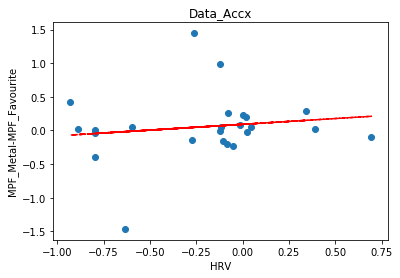

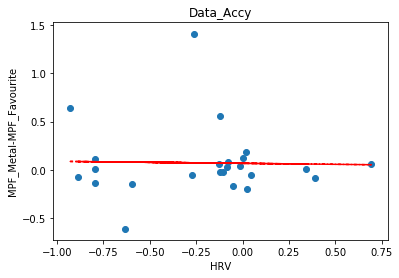

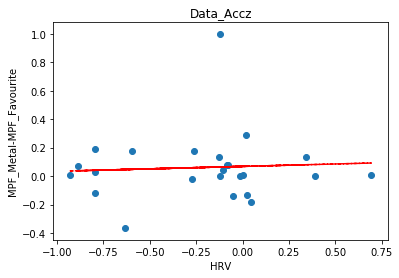

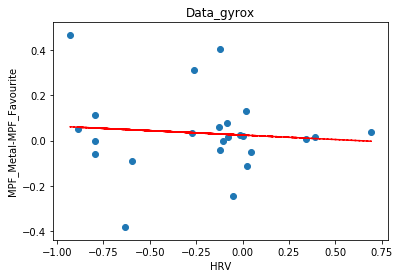

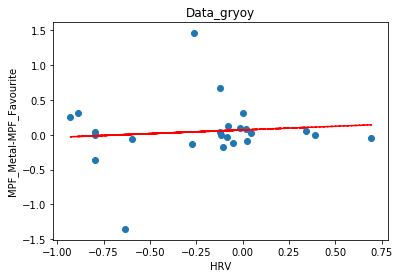

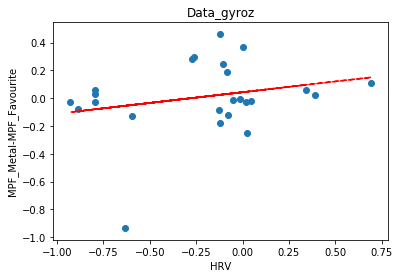

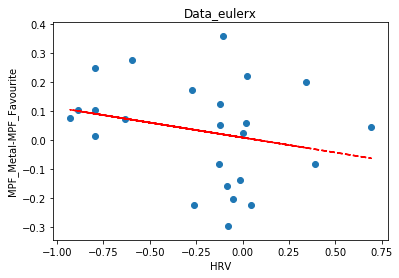

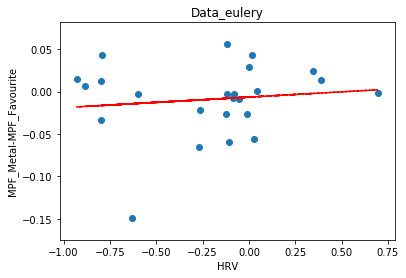

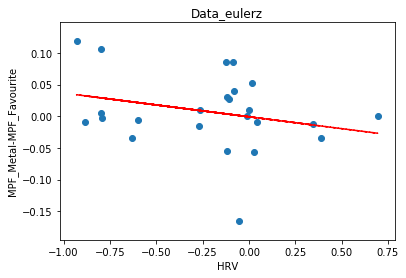

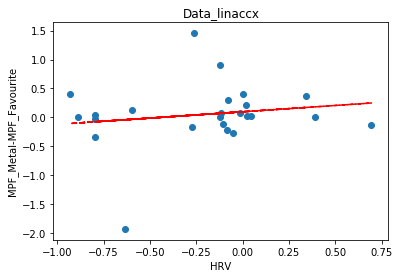

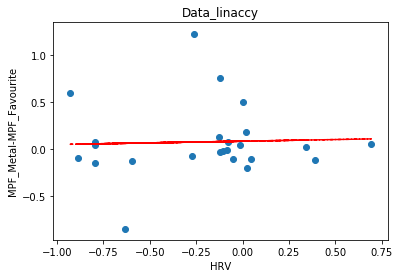

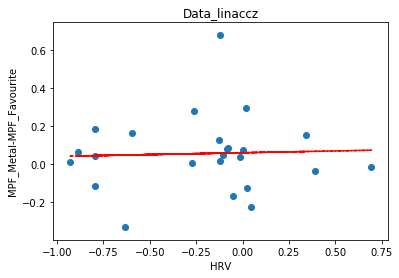

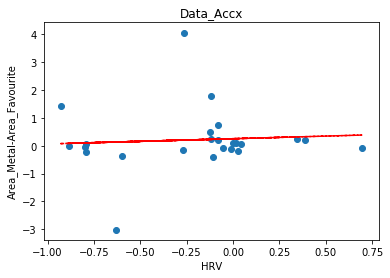

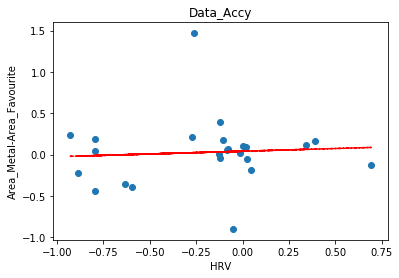

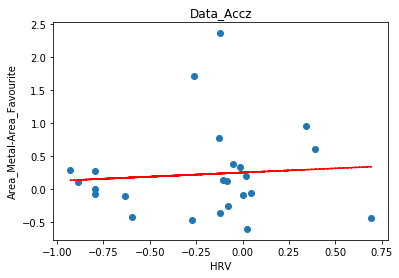

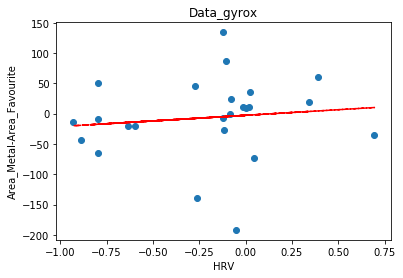

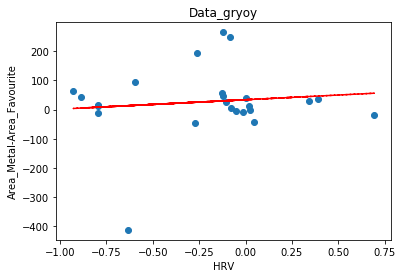

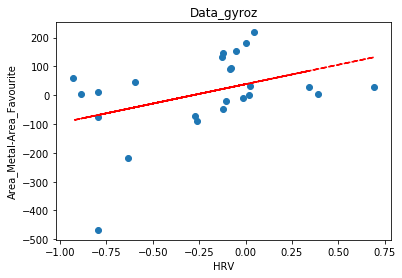

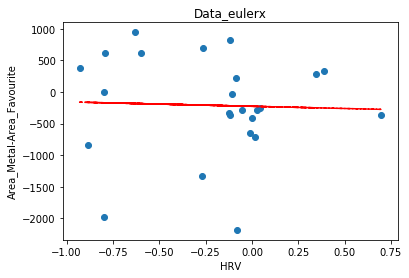

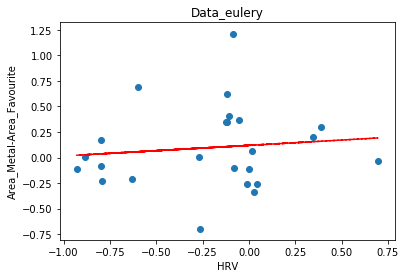

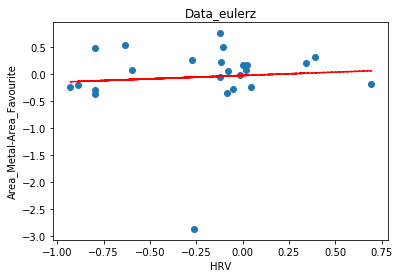

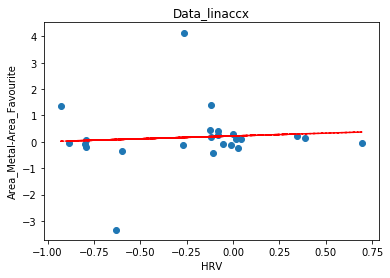

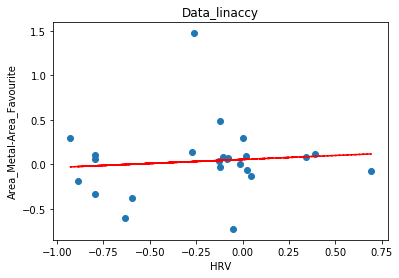

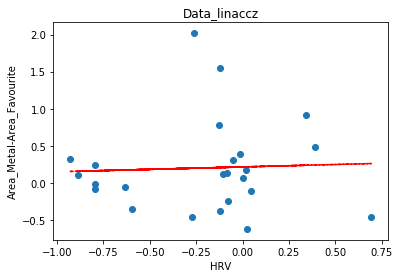

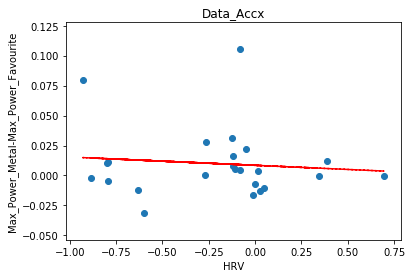

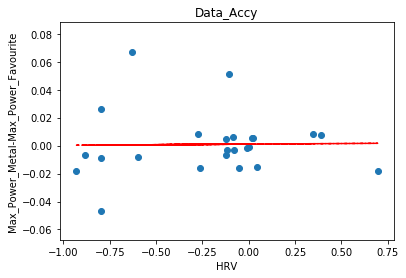

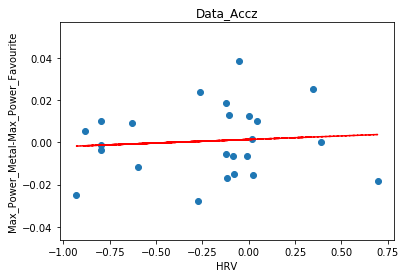

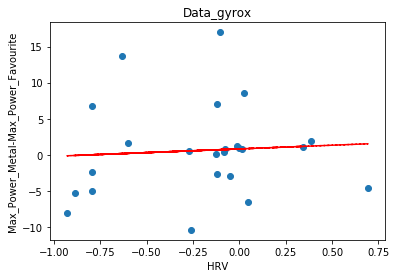

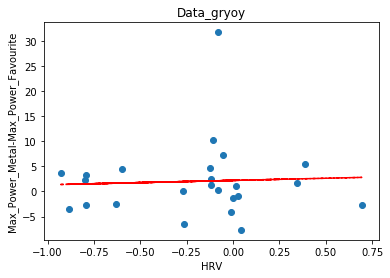

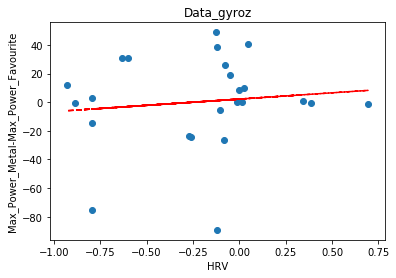

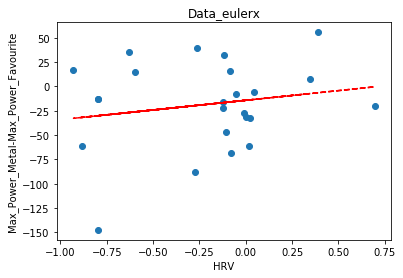

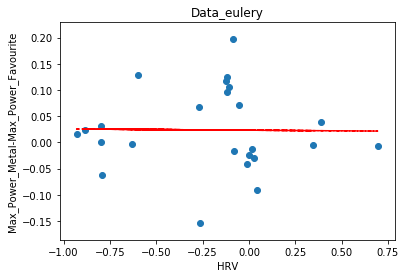

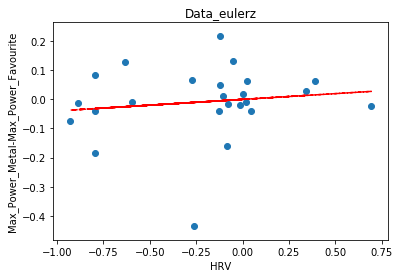

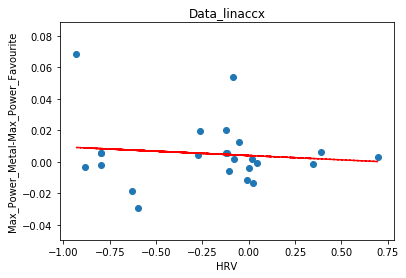

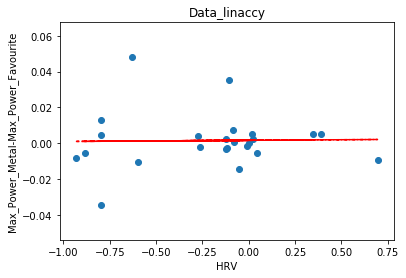

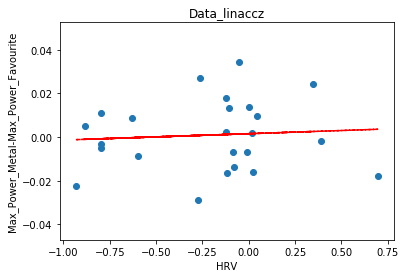

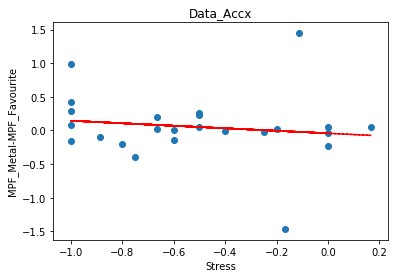

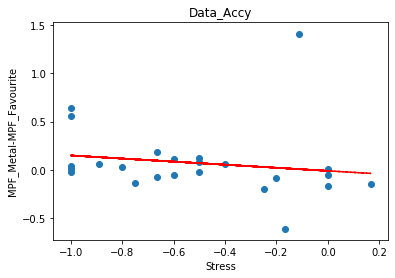

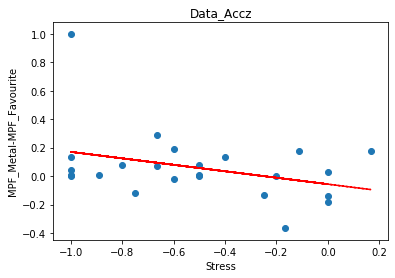

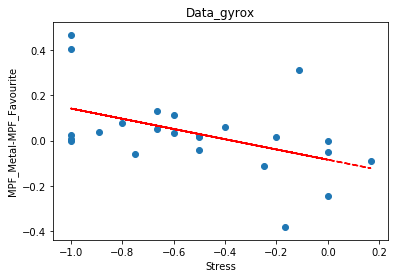

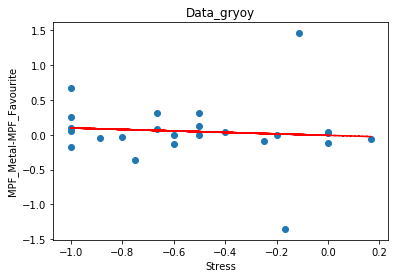

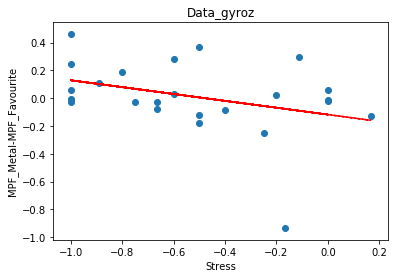

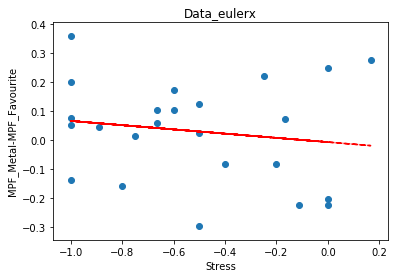

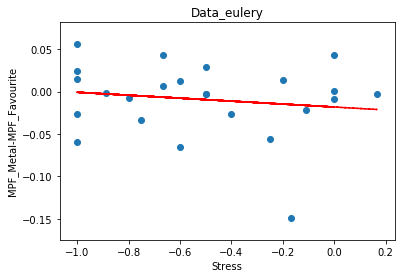

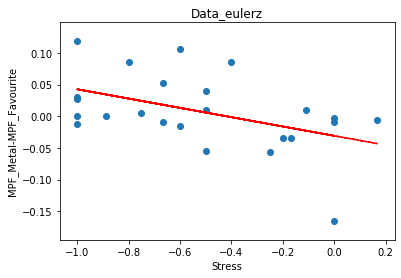

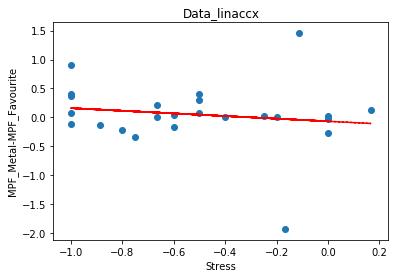

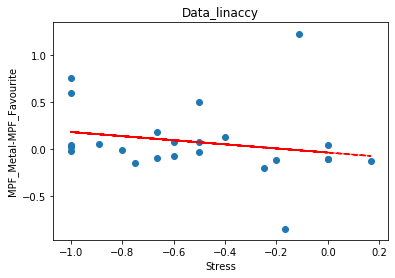

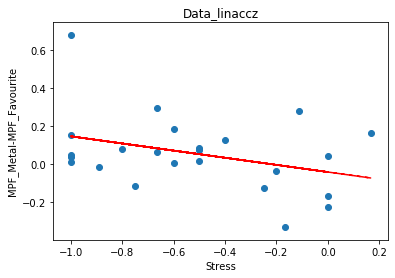

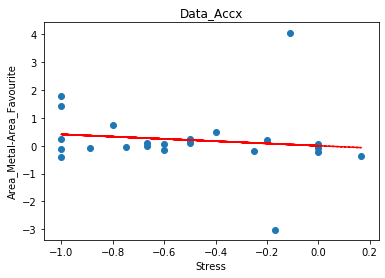

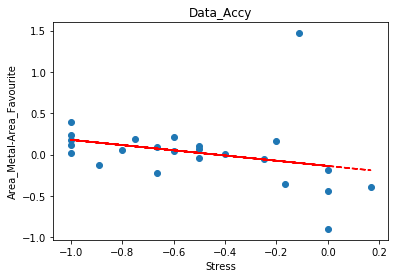

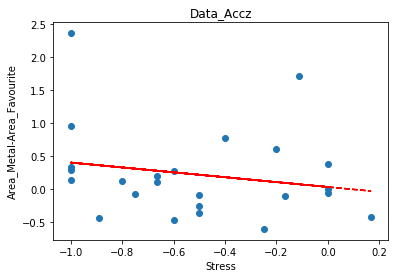

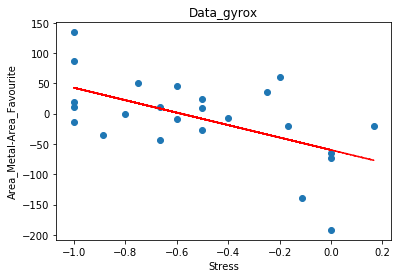

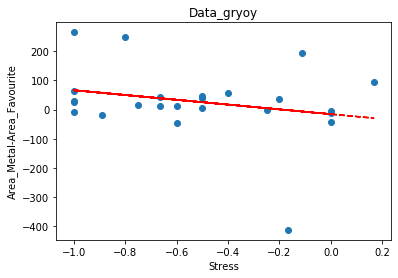

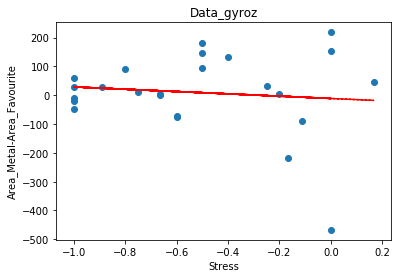

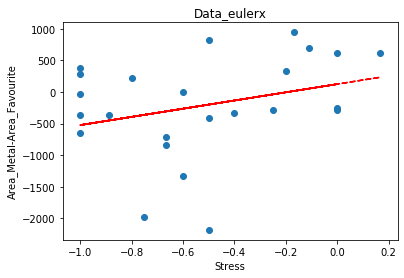

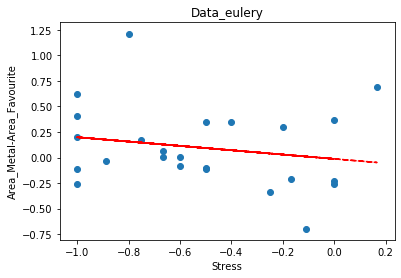

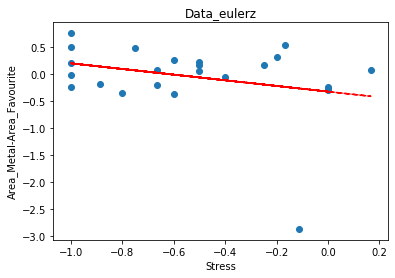

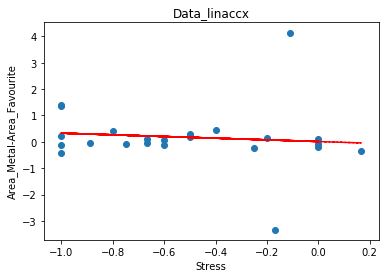

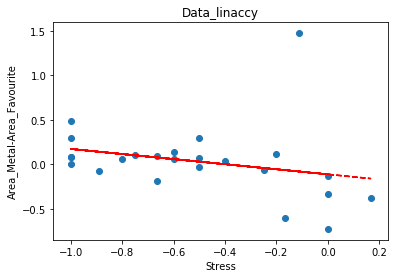

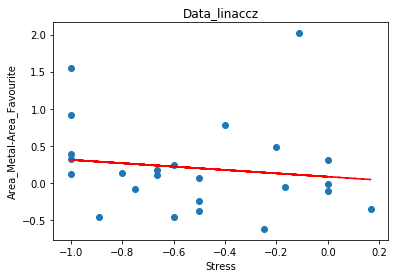

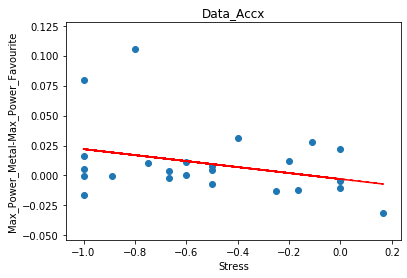

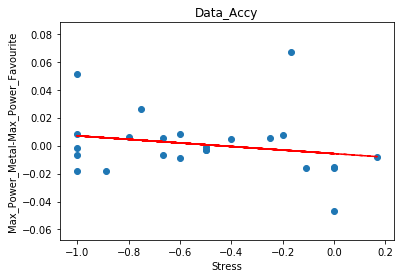

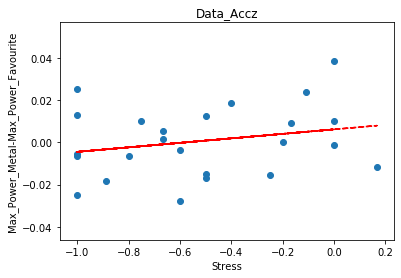

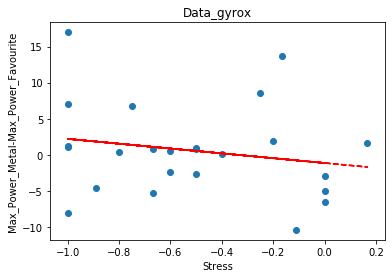

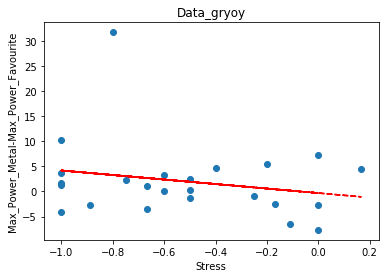

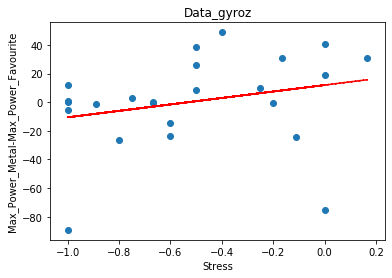

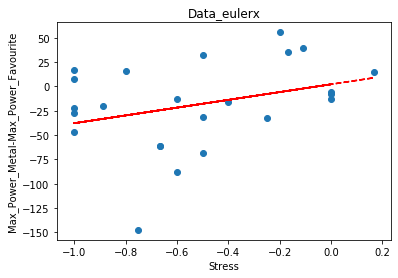

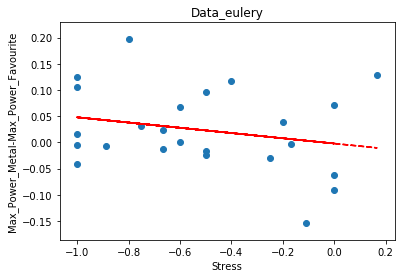

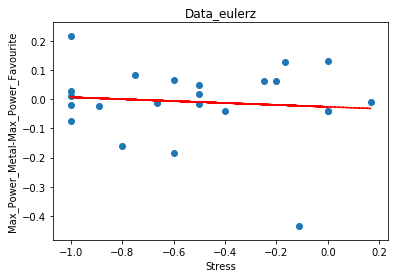

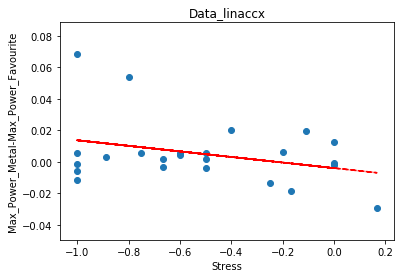

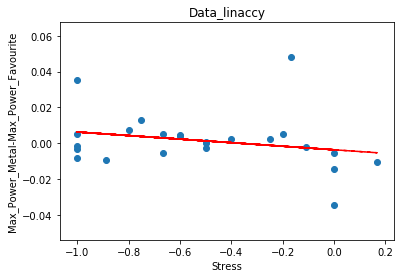

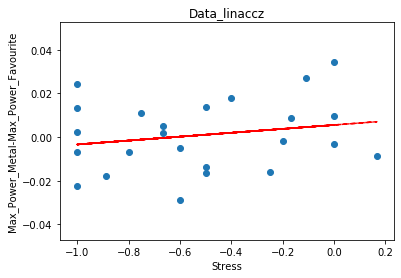

In [28]:
import os
source="G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots\Trend Plot"
os.chdir(source)
Stressor_index=['HRV','Stress']
#Stressor_index=['Tension']
Datapoints=[Data_Accx,Data_Accy,Data_Accz,Data_gyrox,Data_gryoy,Data_gryoz,Data_eulerx,Data_eulery,Data_eulerz,Data_linaccx,Data_linaccy,Data_linaccz]
Datapoints[0].name='Data_Accx'
Datapoints[1].name='Data_Accy'
Datapoints[2].name='Data_Accz'
Datapoints[3].name='Data_gyrox'
Datapoints[4].name='Data_gryoy'
Datapoints[5].name='Data_gyroz'
Datapoints[6].name='Data_eulerx'
Datapoints[7].name='Data_eulery'
Datapoints[8].name='Data_eulerz'
Datapoints[9].name='Data_linaccx'
Datapoints[10].name='Data_linaccy'
Datapoints[11].name='Data_linaccz'
for i in range(len(Stressor_index)):
    os.mkdir(Stressor_index[i])
    os.chdir(Stressor_index[i])
    for order in range(1,2):
        os.mkdir(str(order))
        os.chdir(str(order))
        for j in range(len(parama)):
            for k in range(len(Datapoints)):
                fig=plt.figure()
                plt.scatter(Stressor[Stressor_index[i]],Datapoints[k][parama[j]]-Datapoints[k][paramb[j]])
                z = np.polyfit(Stressor[Stressor_index[i]], Datapoints[k][parama[j]]-Datapoints[k][paramb[j]], order)
                p = np.poly1d(z)
                plt.plot(Stressor[Stressor_index[i]],p(Stressor[Stressor_index[i]]),"r--")
                plt.ylabel(parama[j]+'-'+paramb[j])
                plt.xlabel(Stressor_index[i])
                plt.title(Datapoints[k].name)
                fig.savefig(Stressor_index[i]+'_'+Datapoints[k].name+'_'+parama[j]+'-'+paramb[j]+'.png')
        os.chdir(source)
        os.chdir(Stressor_index[i])
    os.chdir(source)

In [27]:
os.chdir('..')